In [1]:
# Utilities

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve


from sklearn.naive_bayes import MultinomialNB,CategoricalNB,GaussianNB

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

In [3]:
#df=pd.read_csv("..\..\prepared_ravdess_features.csv")
df=pd.read_csv("prepared_ravdess_features.csv")
df.head()

vocal_channel    emotion emotional_intensity                     statement  \
0        speech    fearful              normal  Dogs are sitting by the door   
1        speech      angry              normal  Dogs are sitting by the door   
2        speech      happy              strong  Dogs are sitting by the door   
3        speech  surprised              normal  Kids are talking by the door   
4          song      happy              strong  Dogs are sitting by the door   

  repetition sex  frame_width  length_ms  zero_crossings_sum  mfcc_mean  ...  \
0        2nd   F            2       3737               16995 -33.485947  ...   
1        1st   F            2       3904               13906 -29.502108  ...   
2        2nd   F            2       4671               18723 -30.532463  ...   
3        1st   F            2       3637               11617 -36.059555  ...   
4        2nd   F            2       4404               15137 -31.405996  ...   

   stft_std  stft_min  stft_kur  stft_skew          mean       std       min  \
0  0.335533       0.0 -1.215025   0.403514  3.844916e-07  0.014482 -0.128632   
1  0.352380       0.0 -1.384174   0.290905 -7.149491e-08  0.020417 -0.305725   
2  0.352270       0.0 -1.242947   0.470350  2.429985e-06  0.024317 -0.137482   
3  0.360552       0.0 -1.445318   0.274756  2.373929e-07  0.003561 -0.027374   
4  0.350655       0.0 -1.366742   0.318926  8.454691e-07  0.027522 -0.192169   

        max        kur      skew  
0  0.138947   9.406061  0.273153  
1  0.263062  19.564187  0.292157  
2  0.166351   4.881241  0.302659  
3  0.024078  13.040259 -0.081014  
4  0.242676   7.485109  0.414872  

[5 rows x 30 columns]

In [4]:
df_copy=df.copy()

cat_var=["vocal_channel","emotional_intensity","statement","repetition","sex"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy[i]=le.fit_transform(df_copy[i])
df_copy.head()

vocal_channel    emotion  emotional_intensity  statement  repetition  sex  \
0              1    fearful                    0          0           1    0   
1              1      angry                    0          0           0    0   
2              1      happy                    1          0           1    0   
3              1  surprised                    0          1           0    0   
4              0      happy                    1          0           1    0   

   frame_width  length_ms  zero_crossings_sum  mfcc_mean  ...  stft_std  \
0            2       3737               16995 -33.485947  ...  0.335533   
1            2       3904               13906 -29.502108  ...  0.352380   
2            2       4671               18723 -30.532463  ...  0.352270   
3            2       3637               11617 -36.059555  ...  0.360552   
4            2       4404               15137 -31.405996  ...  0.350655   

   stft_min  stft_kur  stft_skew          mean       std       min       max  \
0       0.0 -1.215025   0.403514  3.844916e-07  0.014482 -0.128632  0.138947   
1       0.0 -1.384174   0.290905 -7.149491e-08  0.020417 -0.305725  0.263062   
2       0.0 -1.242947   0.470350  2.429985e-06  0.024317 -0.137482  0.166351   
3       0.0 -1.445318   0.274756  2.373929e-07  0.003561 -0.027374  0.024078   
4       0.0 -1.366742   0.318926  8.454691e-07  0.027522 -0.192169  0.242676   

         kur      skew  
0   9.406061  0.273153  
1  19.564187  0.292157  
2   4.881241  0.302659  
3  13.040259 -0.081014  
4   7.485109  0.414872  

[5 rows x 30 columns]

In [5]:
"""
Angry=0
Calm=1
Disgust=2
Fearful=3
Happy=4
Neutral=5
Sad=6
Surprised=7

"""

le=preprocessing.LabelEncoder()
df_copy["emotion"]=le.fit_transform(df_copy["emotion"])
df_copy.head()

vocal_channel  emotion  emotional_intensity  statement  repetition  sex  \
0              1        3                    0          0           1    0   
1              1        0                    0          0           0    0   
2              1        4                    1          0           1    0   
3              1        7                    0          1           0    0   
4              0        4                    1          0           1    0   

   frame_width  length_ms  zero_crossings_sum  mfcc_mean  ...  stft_std  \
0            2       3737               16995 -33.485947  ...  0.335533   
1            2       3904               13906 -29.502108  ...  0.352380   
2            2       4671               18723 -30.532463  ...  0.352270   
3            2       3637               11617 -36.059555  ...  0.360552   
4            2       4404               15137 -31.405996  ...  0.350655   

   stft_min  stft_kur  stft_skew          mean       std       min       max  \
0       0.0 -1.215025   0.403514  3.844916e-07  0.014482 -0.128632  0.138947   
1       0.0 -1.384174   0.290905 -7.149491e-08  0.020417 -0.305725  0.263062   
2       0.0 -1.242947   0.470350  2.429985e-06  0.024317 -0.137482  0.166351   
3       0.0 -1.445318   0.274756  2.373929e-07  0.003561 -0.027374  0.024078   
4       0.0 -1.366742   0.318926  8.454691e-07  0.027522 -0.192169  0.242676   

         kur      skew  
0   9.406061  0.273153  
1  19.564187  0.292157  
2   4.881241  0.302659  
3  13.040259 -0.081014  
4   7.485109  0.414872  

[5 rows x 30 columns]

In [6]:
# Print confusion matrix
def print_confMatrix(y_test,y_test_pred):
    cf = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cf, annot=True, cmap="Greens")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()

In [7]:
# Print Roc Curve 
def print_rocCurve(clf,X_test,y_test):
    clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()
    print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

In [8]:
# Print Precision-Recall Curve
def print_precrecCurve(clf,X_test,y_test):
    plot_precision_recall(y_test, clf.predict_proba(X_test),figsize=(10,7))
    plt.show()

In [9]:
#Print Decision Tree

def print_DecisionTree(dt):
    plt.figure(figsize=(20, 4), dpi=300)
    plot_tree(dt, feature_names=df.columns, filled=True)
    plt.show() 

In [11]:
# Funzione per fare la GridSearch()

def customGridSearch(X_train, y_train, model, tuned_parameters,score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    
    print("------- Score = " + score +  "------- \n")
        
    k_fold = RepeatedStratifiedKFold() # 5 split default, 10 repetitions default
    print("> Fold = " + str(k_fold) + "\n")
        
    clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True)
    clf.fit(X_train, y_train)

    print("> Best Parameter set: \n")
    best = clf.best_params_
    print(best)
        
    print("\n> Grid scores:\n")

    means = clf.cv_results_['mean_train_score']
    stds = clf.cv_results_['std_train_score']

    print("...........RESULTS FOR TRAINING.........")
    print("........................................")

   
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                          
    print("____________________________________________ END GRID SEARCH ____________________________________________")
        
    results[score] = best
    
    return results

In [12]:
# Funzione per fare la RandomizedGridSearch()

def customRandomSearch(X_train, y_train, model, tuned_parameters, score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    
    print("------- Score = " + score +  "------- \n")
        
    k_fold = RepeatedStratifiedKFold() # 5 split default, 10 repetitions default
    print("> Fold = " + str(k_fold) + "\n")

    print(" Start combinations")

    clf = RandomizedSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True, n_iter=200)
    clf.fit(X_train, y_train)

    print(" Finish combinations")

    print("> Best Parameter set: \n")
    best = clf.best_params_
    print(best)
        
    print("\n> Grid scores:\n")

    means = clf.cv_results_['mean_train_score']
    stds = clf.cv_results_['std_train_score']

    print("...........RESULTS FOR TRAINING.........")
    print("........................................")

   
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                          
    print("____________________________________________ END GRID SEARCH ____________________________________________")
        
    results[score] = best
    
    return results

In [13]:
# Normalizzazione delle variabili numeriche pure

df_normalized = df_copy.copy()

numeric_features = [n for n in df_normalized.columns if n!="emotion" and n!= "vocal_channel" and n!= "emotional_intensity" and n!= "statement" and n!= "repetition" and n!= "sex"]

scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_normalized[numeric_features])
df_normalized[numeric_features] = scaled_features

In [14]:
col=[x for x in df_normalized.columns if x!="emotion"]
X=df_normalized[col].values
y = np.array(df_normalized["emotion"])

#holdout
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

In [48]:
# Esperimento 1: hyperparameters tuning with "f1_macro"    

check_params = {
    "n_neighbors": np.arange(2,30), 
    'weights': ['uniform', 'distance'],
    'metric': ["euclidean", "manhattan", "minkowski"]
}

clf=KNeighborsClassifier()
results = customGridSearch(X_train, y_train, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.634 (+/-0.020) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.619 (+/-0.017) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.592 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.570 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'un

In [52]:
learner = KNeighborsClassifier(n_neighbors= 12, metric= 'manhattan', weights= 'distance')
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       110
           1       0.59      0.59      0.59       110
           2       0.37      0.33      0.35        58
           3       0.43      0.38      0.40       112
           4       0.35      0.32      0.34       111
           5       0.27      0.27      0.27        56
           6       0.32      0.33      0.33       112
           7       0.40      0.49      0.44        57

    accuracy                           0.43       726
   macro avg       0.41      0.41      0.41       726
weighted avg       0.42      0.43      0.42       726



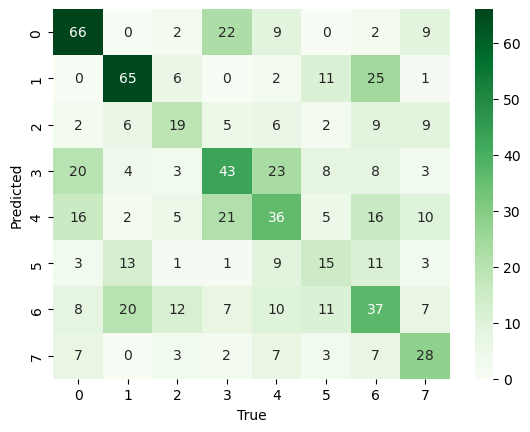

In [54]:
print_confMatrix(y_test,predictions)

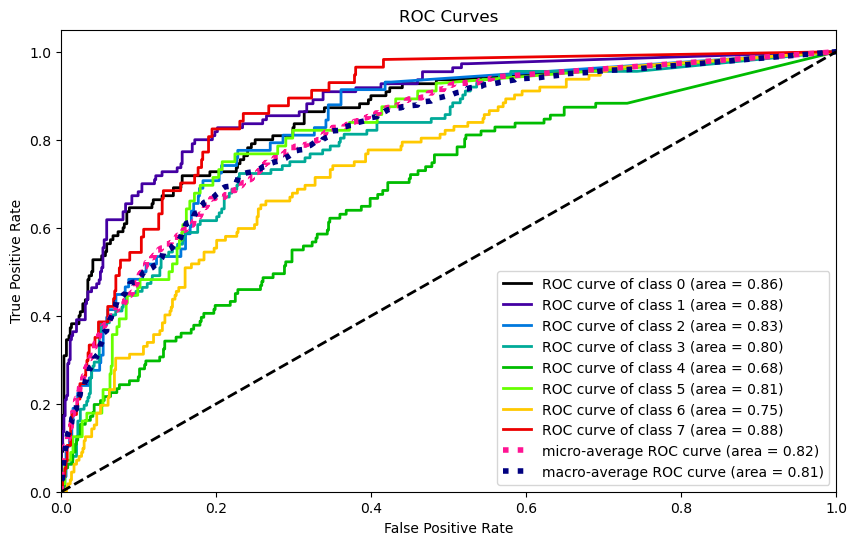

0.8114758211905819


In [55]:
print_rocCurve(learner,X_test,y_test)

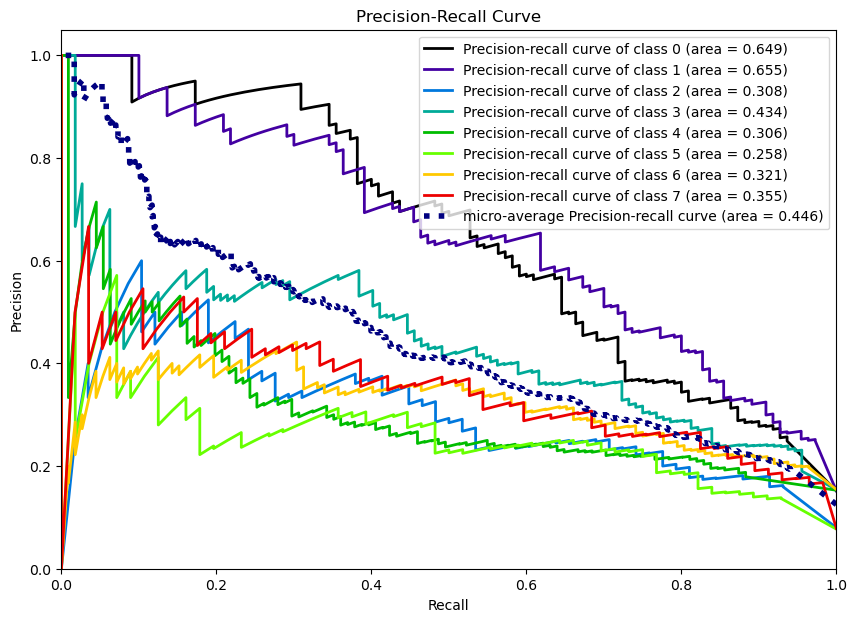

In [56]:
print_precrecCurve(learner,X_test,y_test)

In [66]:
%%time

# Esperimento 2: hyperparameters tuning without custom grid search ---> metodo visto a lezione

param_grid = {
    "n_neighbors": np.arange(2,30),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"], # cityblock is the manhattan distance
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0), # with no parameters it is with 5 split and 10 repetitions
    n_jobs=-1,
    refit=True,
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

CPU times: total: 5.67 s
Wall time: 51.8 s


In [67]:
print(grid.best_params_, grid.best_score_) # return the accuracy. ---> Ho notato che ha restituito gli stessi risultati fatta eccezione per la metric=cityblock

{'metric': 'cityblock', 'n_neighbors': 12, 'weights': 'distance'} 0.3923773367544641


In [68]:
clf.score(X_test, y_test)

0.4256198347107438

In [69]:
grid.cv_results_  # this is a dictionary containing, for each combinations of hyperparameters, all the matrix that u want to compute for accuracy and the accuracy for each split

{'mean_fit_time': array([0.00283123, 0.00256015, 0.00287907, 0.00224107, 0.00272109,
        0.00272247, 0.00192268, 0.0017605 , 0.00160014, 0.00160044,
        0.0032851 , 0.0029436 , 0.00215438, 0.00112584, 0.00244654,
        0.00155864, 0.0024978 , 0.00259471, 0.00256864, 0.00176117,
        0.00231845, 0.00292406, 0.00304855, 0.00376231, 0.00262012,
        0.00268977, 0.00224986, 0.00191279, 0.00161825, 0.00141835,
        0.00187426, 0.00126024, 0.00191015, 0.00309998, 0.00127236,
        0.00231171, 0.00200056, 0.00148364, 0.00311234, 0.00185316,
        0.00261615, 0.00249143, 0.00191118, 0.00198429, 0.00225907,
        0.00205265, 0.00144   , 0.00226528, 0.00227269, 0.00195634,
        0.00280536, 0.00257285, 0.00317683, 0.00260106, 0.00147804,
        0.00200143, 0.00194598, 0.00176135, 0.00195277, 0.00221384,
        0.00230156, 0.00192219, 0.00148403, 0.00208304, 0.00162679,
        0.00159625, 0.00122551, 0.0012302 , 0.00312821, 0.00275607,
        0.00124345, 0.00198416,

In [70]:
results = pd.DataFrame(grid.cv_results_)  
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.002831      0.005406         0.110334        0.096221   
1         0.002560      0.004060         0.033289        0.012535   
2         0.002879      0.004159         0.070580        0.017284   
3         0.002241      0.003594         0.028647        0.006807   
4         0.002721      0.004115         0.061850        0.012016   
..             ...           ...              ...             ...   
107       0.001442      0.003077         0.046570        0.007624   
108       0.001440      0.003074         0.076339        0.010880   
109       0.002283      0.003581         0.046625        0.007521   
110       0.001609      0.003054         0.075600        0.010158   
111       0.001500      0.003018         0.042806        0.006677   

    param_metric param_n_neighbors param_weights  \
0      euclidean                 2       uniform   
1      euclidean                 2      distance   
2      euclidean                 3       uniform   
3      euclidean                 3      distance   
4      euclidean                 4       uniform   
..           ...               ...           ...   
107    cityblock                27      distance   
108    cityblock                28       uniform   
109    cityblock                28      distance   
110    cityblock                29       uniform   
111    cityblock                29      distance   

                                                params  split0_test_score  \
0    {'metric': 'euclidean', 'n_neighbors': 2, 'wei...           0.330383   
1    {'metric': 'euclidean', 'n_neighbors': 2, 'wei...           0.339233   
2    {'metric': 'euclidean', 'n_neighbors': 3, 'wei...           0.345133   
3    {'metric': 'euclidean', 'n_neighbors': 3, 'wei...           0.345133   
4    {'metric': 'euclidean', 'n_neighbors': 4, 'wei...           0.327434   
..                                                 ...                ...   
107  {'metric': 'cityblock', 'n_neighbors': 27, 'we...           0.368732   
108  {'metric': 'cityblock', 'n_neighbors': 28, 'we...           0.339233   
109  {'metric': 'cityblock', 'n_neighbors': 28, 'we...           0.348083   
110  {'metric': 'cityblock', 'n_neighbors': 29, 'we...           0.321534   
111  {'metric': 'cityblock', 'n_neighbors': 29, 'we...           0.353982   

     split1_test_score  ...  split43_test_score  split44_test_score  \
0             0.292899  ...            0.337278            0.349112   
1             0.269231  ...            0.366864            0.346154   
2             0.301775  ...            0.352071            0.346154   
3             0.269231  ...            0.352071            0.363905   
4             0.334320  ...            0.340237            0.375740   
..                 ...  ...                 ...                 ...   
107           0.372781  ...            0.378698            0.417160   
108           0.378698  ...            0.369822            0.399408   
109           0.372781  ...            0.378698            0.420118   
110           0.381657  ...            0.366864            0.402367   
111           0.378698  ...            0.384615            0.417160   

     split45_test_score  split46_test_score  split47_test_score  \
0              0.321534            0.313609            0.328402   
1              0.297935            0.325444            0.340237   
2              0.286136            0.310651            0.325444   
3              0.309735            0.328402            0.346154   
4              0.333333            0.307692            0.334320   
..                  ...                 ...                 ...   
107            0.362832            0.384615            0.420118   
108            0.336283            0.360947            0.411243   
109            0.368732            0.375740            0.434911   
110            0.330383            0.363905            0.420118   
111            0.359882            0

In [71]:
results["metric_weight"] = results["param_metric"] + " , " + results["param_weights"] # lo posso fare perchè sono entrambe categoriche

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

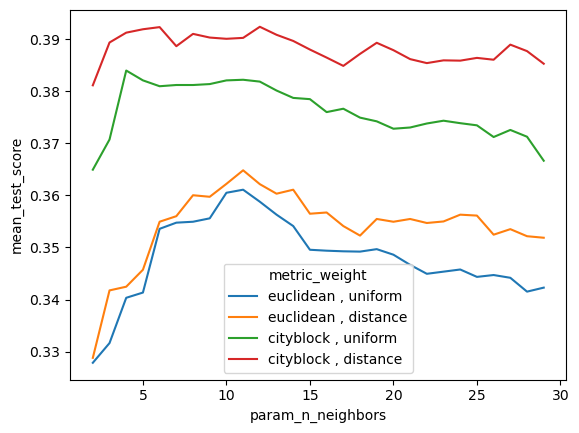

In [72]:
sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)

In [74]:

learner = KNeighborsClassifier(n_neighbors= 12, metric= 'cityblock', weights= 'distance')
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print(classification_report(y_test,predictions))

# I risultati non cambiano 

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       110
           1       0.59      0.59      0.59       110
           2       0.37      0.33      0.35        58
           3       0.43      0.38      0.40       112
           4       0.35      0.32      0.34       111
           5       0.27      0.27      0.27        56
           6       0.32      0.33      0.33       112
           7       0.40      0.49      0.44        57

    accuracy                           0.43       726
   macro avg       0.41      0.41      0.41       726
weighted avg       0.42      0.43      0.42       726



In [16]:
# Esperimento 3: hyperparameters tuning with "recall"    

check_params = {
    "n_neighbors": np.arange(2,30), 
    'weights': ['uniform', 'distance'],
    'metric': ["euclidean", "manhattan", "minkowski"]
}

clf=KNeighborsClassifier()
results = customGridSearch(X_train, y_train, clf, check_params, "recall_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = recall_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.643 (+/-0.017) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.614 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.591 (+/-0.024) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.568 (+/-0.022) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 

In [18]:
learner = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 4, weights= 'distance')
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50       110
           1       0.56      0.54      0.55       110
           2       0.38      0.41      0.40        58
           3       0.43      0.41      0.42       112
           4       0.29      0.27      0.28       111
           5       0.28      0.36      0.31        56
           6       0.40      0.40      0.40       112
           7       0.46      0.46      0.46        57

    accuracy                           0.42       726
   macro avg       0.41      0.42      0.41       726
weighted avg       0.42      0.42      0.42       726



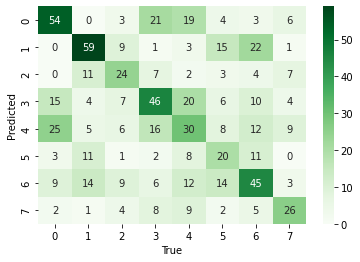

In [29]:
print_confMatrix(y_test,predictions)

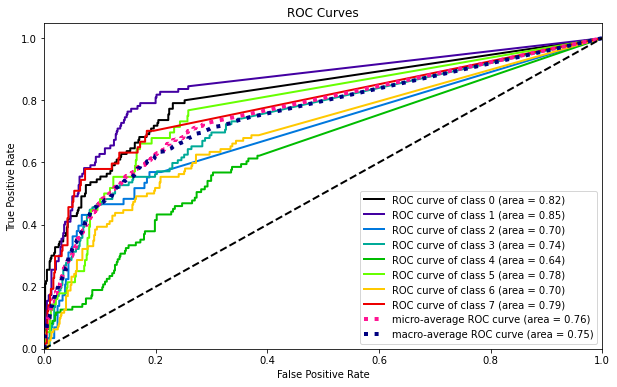

0.7515979479815021


In [30]:
print_rocCurve(learner,X_test,y_test)

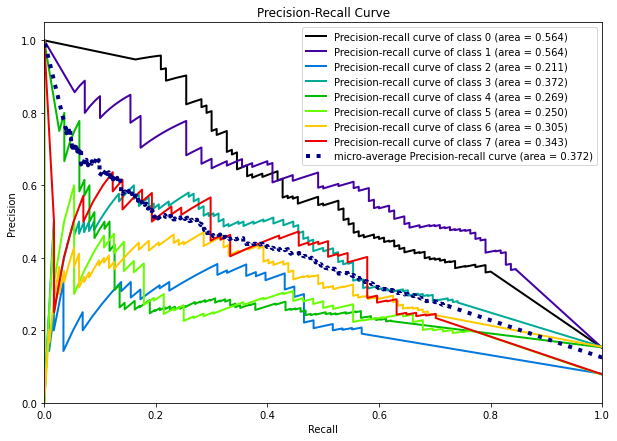

In [31]:
print_precrecCurve(learner,X_test,y_test)

In [15]:
# Esperimento 4: hyperparameters tuning with "precision" 

check_params = {
    "n_neighbors": np.arange(2,30), 
    'weights': ['uniform', 'distance'],
    'metric': ["euclidean", "manhattan", "minkowski"]
}

clf=KNeighborsClassifier()
results = customGridSearch(X_train, y_train, clf, check_params, "precision_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = precision_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.722 (+/-0.016) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.666 (+/-0.020) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.612 (+/-0.022) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.579 (+/-0.023) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.566 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'euclidean

In [16]:
learner = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 10, weights= 'distance')
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       110
           1       0.58      0.55      0.56       110
           2       0.41      0.43      0.42        58
           3       0.42      0.38      0.40       112
           4       0.33      0.29      0.31       111
           5       0.25      0.27      0.26        56
           6       0.32      0.32      0.32       112
           7       0.39      0.46      0.42        57

    accuracy                           0.42       726
   macro avg       0.40      0.41      0.41       726
weighted avg       0.42      0.42      0.42       726



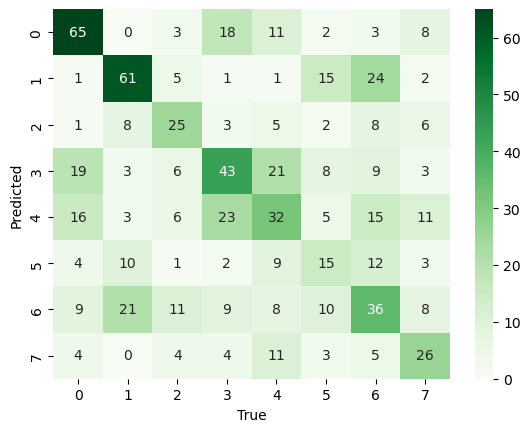

In [18]:
print_confMatrix(y_test,predictions)

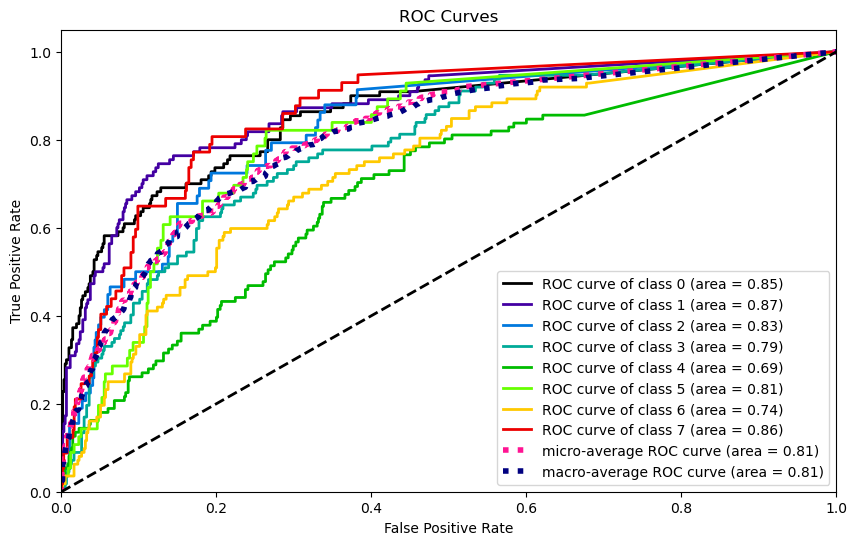

0.8051799300638944


In [21]:
print_rocCurve(learner,X_test,y_test)

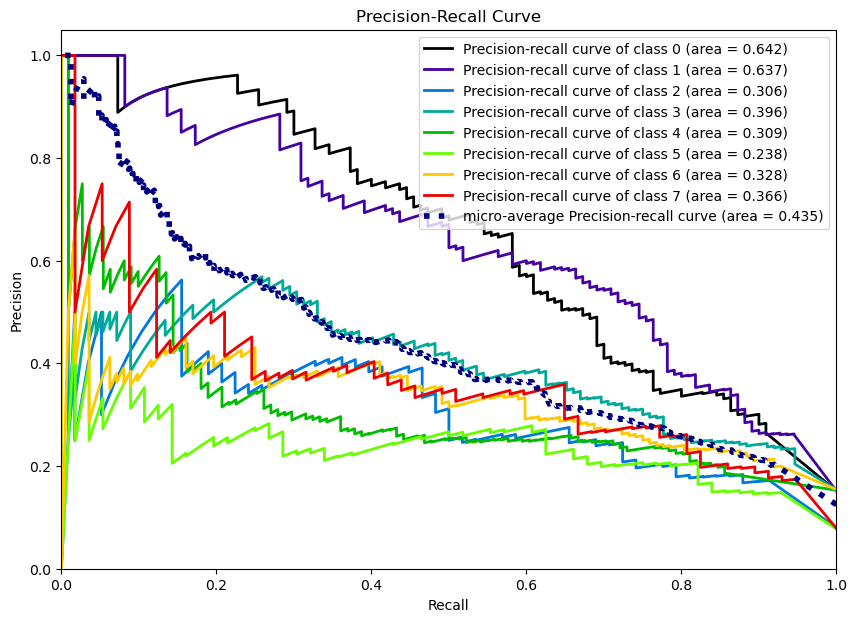

In [23]:
print_precrecCurve(learner,X_test,y_test)